Dataset source: https://www.kaggle.com/datasets/farhadzeynalli/online-advertising-effectiveness-study-ab-testing

# Marketing A/B testing

A large company with a substantial user base plans to increase sales through advertisement on its website. However, they are still undecided about whether the ads increase sales or not. In order to determine whether this is the case, 20000 customers were subjected to A/B testing for 31 days.

The company is interested in answering two questions:

1) Would the campaign be successful?
2) If the campaign was successful, how much of that success could be attributed to the ads?  

For second question an A/B test is used. The majority of the people will be exposed to ads (the experimental group). And a small portion of people (the control group) would instead see a Public Service Announcement (PSA) (or nothing) in the exact size and place the ad would normally be.

The idea of the dataset is to analyze the groups, find out if the ads were successful, how much the company can make from the ads, and if the difference between the groups is statistically significant.

#### Columns description:

- **customerID:** unique identifier for the customer.
- **test group:** consists of AD (the experimental group) and PSA (control group).
- **made_purchase:** a Boolean value representing whether or not the user made a purchase after seeing an advertisement.
- **days_with_most_ad:** A day of the month when the user saw the most ads
- **peak ad hours:** an hour of the day when the user saw the most ads.
- **ad_count:** total number of ads seen by each user.

In [14]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, chi2

%matplotlib inline

In [15]:
df = pd.read_csv('online_ad_AB.csv')

In [16]:
df.head()

,customerID,test group,made_purchase,days_with_most_ad,peak ad hours,ad_count
0,1,ad,False,24,20,5
1,2,psa,False,21,16,9
2,3,psa,False,1,18,8
3,4,ad,False,20,23,7
4,5,ad,False,3,13,5


In [17]:
# Cheking empty values

df.isnull().sum()

customerID           0
test group           0
made_purchase        0
days_with_most_ad    0
peak ad hours        0
ad_count             0
dtype: int64

In [18]:
# What is the distribution between 2 groups?

df['test group'].value_counts(normalize=True) * 100

test group
ad     60.265
psa    39.735
Name: proportion, dtype: float64

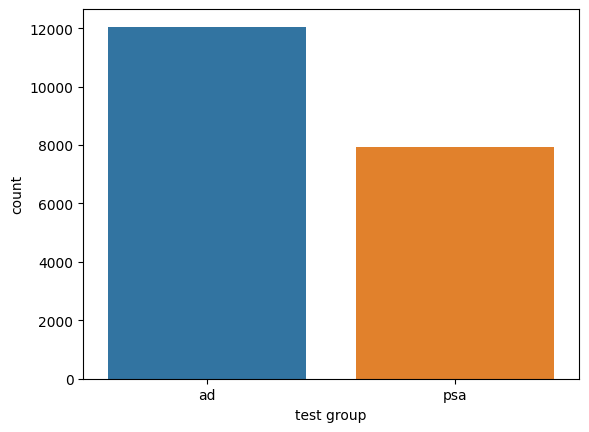

In [19]:
sns.countplot(x=df['test group'])
plt.show()

In [20]:
# split data into 2 groups

psa = df.loc[df['test group'] == "psa"]
ads = df.loc[df['test group'] == "ad"]

In [21]:
# Creating a contingency table to check conversion rate for each group

contingency_table = pd.crosstab(index=df['made_purchase'], columns=df['test group'], margins = True)
contingency_table

test group,ad,psa,All
made_purchase,,,
False,11250,7690,18940
True,803,257,1060
All,12053,7947,20000


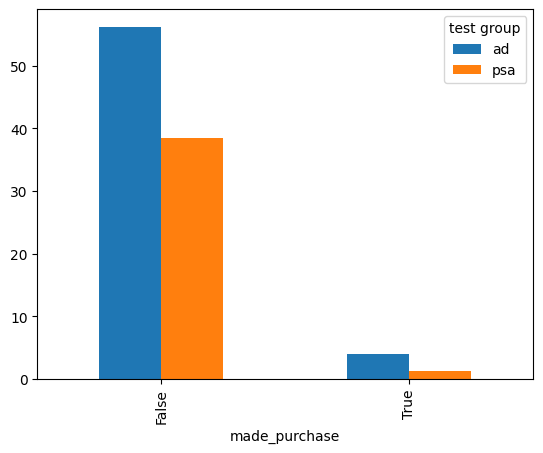

In [22]:
# Plotting data

CT = pd.crosstab(index=df['made_purchase'], columns=df['test group'],normalize = True)*100
CT.plot(kind='bar')

plt.show()

In [23]:
# experimental group is showing  higher conversion rate than control group 

## Hypothesis:

- Null Hypothesis: The proportion of customers who made a purchase after seeing an ad is equal to the proportion of customers who made a purchase after seeing a PSA

- Alternative: The proportion of customers who made a purchase after seeing an ad is not equal to the proportion of customers who made a purchase after seeing a PSA

Significance level is set to 0.05


In [25]:
# Performing Chi-squared test for independence

chi2_stat, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared test statistic: {chi2_stat:.4f}")
print(f"p-value: {p}")

Chi-squared test statistic: 112.1513
p-value: 2.5298607497724276e-23


## According to the results of Chi-squared test, we can reject Null hypothesis as the p-value is lower than the significance level, and Chi-statistic value is showing us that the advertisement experimental group is performing better.

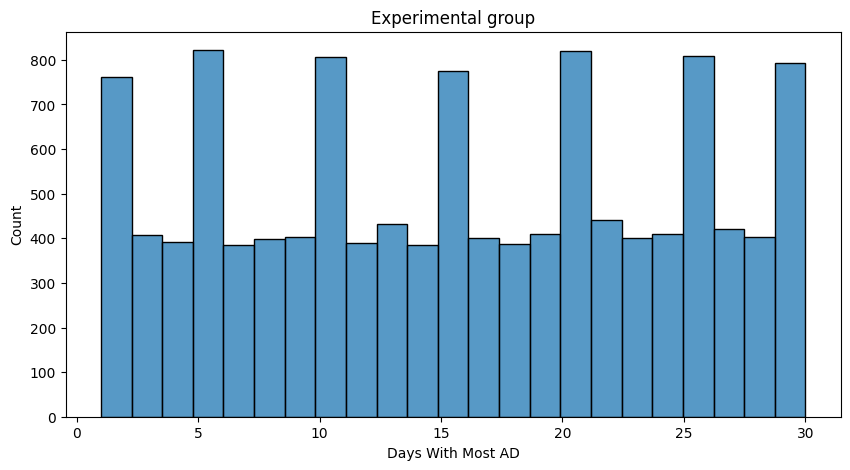

In [26]:
plt.figure(figsize=(10,5))
ax = sns.histplot(data=ads, x='days_with_most_ad')
ax.set_title('Experimental group')
plt.xlabel('Days With Most AD')

plt.show()

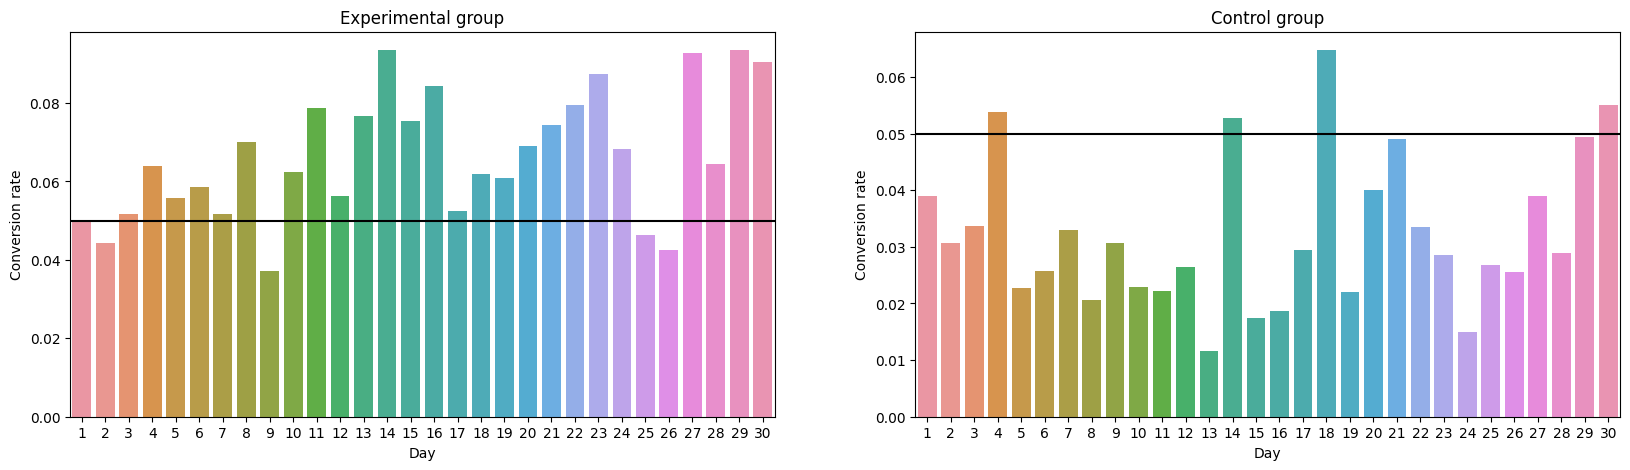

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))

sns.barplot(data=ads, x='days_with_most_ad', y='made_purchase', errorbar=None, ax=ax1)
ax1.set_title('Experimental group')
ax1.set_xlabel('Day')
ax1.set_ylabel('Conversion rate')

sns.barplot(data=psa, x='days_with_most_ad', y='made_purchase', errorbar=None, ax=ax2)
ax2.set_title('Control group')
ax2.set_xlabel('Day')
ax2.set_ylabel('Conversion rate')

ax1.axhline(y=0.05, color='black', linestyle='-')
ax2.axhline(y=0.05, color='black', linestyle='-')

plt.show()

### The control group had the highest conversion rate at the beginning, middle, and end of the month. However, the experimental group had a significantly better conversion rate on days 19-23.

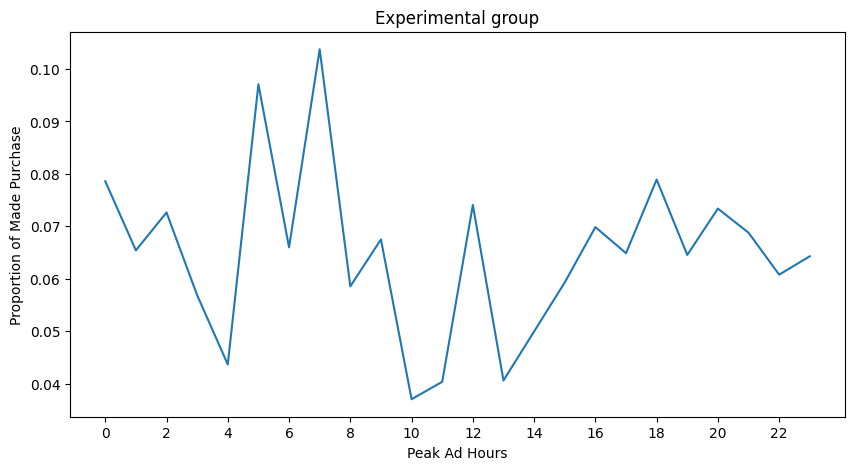

In [28]:
plt.figure(figsize=(10,5))
ax = sns.lineplot(data=ads, x='peak ad hours', y='made_purchase', estimator=np.mean, errorbar = None)
ax.set_title('Experimental group')
ax.set_xlabel('Peak Ad Hours')
ax.set_ylabel('Proportion of Made Purchase')
ax.set_xticks(range(0, 24, 2))

plt.show()

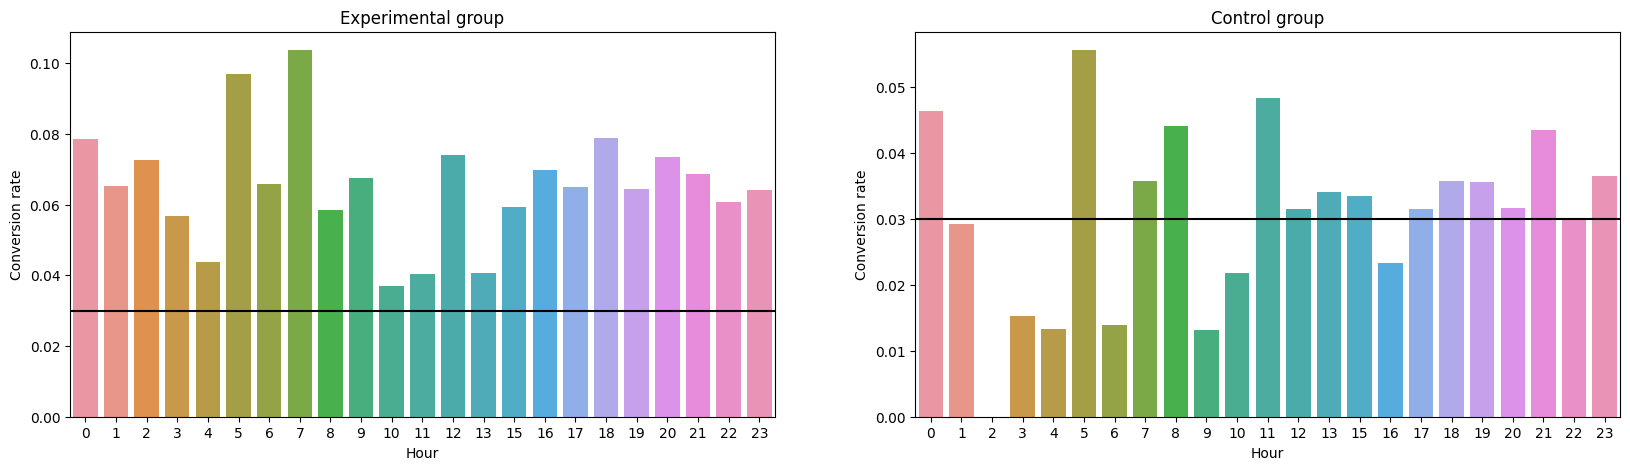

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))

sns.barplot(data=ads, x='peak ad hours', y='made_purchase', errorbar=None, ax=ax1)
ax1.set_title('Experimental group')
ax1.set_xlabel('Hour')
ax1.set_ylabel('Conversion rate')

sns.barplot(data=psa, x='peak ad hours', y='made_purchase', errorbar=None, ax=ax2)
ax2.set_title('Control group')
ax2.set_xlabel('Hour')
ax2.set_ylabel('Conversion rate')

ax1.axhline(y=0.03, color='black', linestyle='-')
ax2.axhline(y=0.03, color='black', linestyle='-')

plt.show()

### The experimental group is showing notable improvement early in the morning.

In [30]:
# Creating a contingency table to find optimal number of ads

contingency_table = pd.crosstab(index=ads['ad_count'], columns=ads['made_purchase'], normalize='columns')
contingency_table = contingency_table.sort_values(by=True, ascending=False)

contingency_table

made_purchase,False,True
ad_count,,
5,0.171822,0.160648
7,0.119378,0.149440
8,0.128978,0.133250
9,0.131111,0.125778
6,0.123200,0.118306
10,0.122489,0.117061
2,0.050489,0.059776
3,0.051556,0.053549
1,0.050400,0.042341


#### The optimal number of ads per month is 5 or 7.